# 챕터 12 실습 코드들 

챕터 12의 실습에 필요한 코드 예제를 구글 코랩에서 여시려면 [링크](https://colab.research.google.com/drive/10oc1PXaScf4ypIg-iUN8nzjeyPUd6uuD?usp=sharing
)를 클릭하시거나 아래의 주소를 웹브라우저에 복사해 주세요. 

실습 코드 링크: https://colab.research.google.com/drive/10oc1PXaScf4ypIg-iUN8nzjeyPUd6uuD?usp=sharing

## 12.3.	모델검증과 평가실습 

### [코드 예제 12.3.1-1: 필요한 모듈 불러오기] 

In [ ]:
# 필요한 모듈 불러오기 
import numpy as np
import pandas as pd

# 시각화에 필요한 모듈 불러오기 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

### [코드 예제 12.3.1-2: 실습에 사용할 데이터 불러오기] 

In [ ]:
# 데이터셋 불러오기 
df = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH11_X15.csv", sep="\t", index_col=None)

print("데이터 셋은 총 {}개의 행과 {} 개의 열로 이루어져 있습니다".format(*df.shape))

print(df.head(5))

데이터 셋은 총 60개의 행과 16 개의 열로 이루어져 있습니다
          y        x1            x2  ...           x13           x14           x15
0  1.329230  0.000244  5.975186e-08  ...  1.112459e-47  2.719317e-51  6.647151e-55
1  0.606966  0.010496  1.101604e-04  ...  1.875705e-26  1.968690e-28  2.066283e-30
2  0.605073  0.022601  5.107831e-04  ...  4.013629e-22  9.071005e-24  2.050094e-25
3  0.669930  0.024876  6.188219e-04  ...  1.396938e-21  3.475041e-23  8.644558e-25
4  0.300294  0.071632  5.131087e-03  ...  1.307257e-15  9.364091e-17  6.707648e-18

[5 rows x 16 columns]


### [코드 예제 12.3.2-1: 모델 학습에 필요한 모듈 불러오기] 

In [15]:
# 모델 학습에 필요한 모듈 불러오기 
import sklearn
from sklearn.linear_model import LinearRegression

### [코드 예제 12.3.2-2: 회귀분석 모델 학습] 

In [ ]:
# 학습에 사용할 변수 설정 
col_list1 = ['x1'] 
col_list2 = ['x'+str(x) for x in range(1,6,1)]
col_list3 = ['x'+str(x) for x in range(1,16,1)]


# 세 개의 모델 선언 
lm1 = LinearRegression() 
lm5 = LinearRegression()
lm15 = LinearRegression()

# 모델 학습 
lm1.fit(df[col_list1], df['y']) # 변수 하나 
lm5.fit(df[col_list2], df['y']) # 변수 다섯개 
lm15.fit(df[col_list3], df['y']) # 변수 열 다섯개 


### [코드 예제 12.3.2-3: 학습된 모델을 사용해 Y값 예측] 

In [ ]:
# 모델을 사용해 Y값 예측 
lm_pred1 = lm1.predict(X=df[col_list1]) 
lm_pred5 = lm5.predict(X=df[col_list2])
lm_pred15 = lm15.predict(X=df[col_list3])

### [코드 예제 12.3.2-4: 과소적합과 과대적합 시각화] 

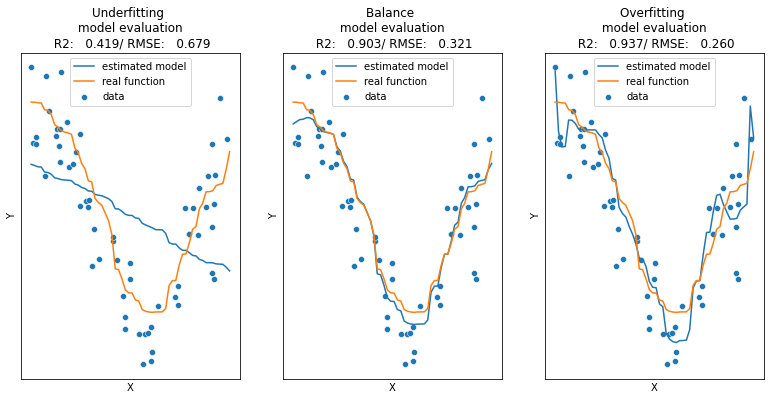

In [13]:
# 이미지 설정 
plt.figure(figsize=(18, 6)) 

# 
m_list = ['lm_pred1', 'lm_pred5', 'lm_pred15'] # 사용할 모델 리스트
degree = ['Underfitting','Balance', 'Overfitting'] # 시각화의 제목을 바꾸기위한 리스트 

transform = lambda x: np.cos(1.7 * np.pi * x) # 데이터를 변화시키기 위한 람다함수 

# 각 모델 성능 평가 
for i, figure in enumerate(m_list): 
    
    # 모델 평가 수치 계산 (MSE/R^2)
    score = np.sqrt(sklearn.metrics.mean_squared_error(df['y'], eval(m_list[i]))) # MSE  
    r2_score = np.sqrt(sklearn.metrics.r2_score(df['y'], eval(m_list[i]))) # R^2

    # 그래프 위치 지정 
    ax = plt.subplot(1, 4, i+1)  

    # 0부터 60까지 x 생성 
    x = np.linspace(0, 1, 60) 
    
    # 모델이 예측한 값 
    sns.lineplot(x=x, y=eval(figure), label='estimated model')
    # 실제 데이터 
    sns.lineplot(x=x, y=transform(df['x1']), label='real function')

    # 데이터 산점도 
    sns.scatterplot(x=df['x1'], y=df['y'], label='data') 

    # 이미지 정보표시 
    plt.setp(ax, xticks=(), yticks=()) # x와 y축 틱 없애기 
    ax.set(title = "{degree} \n model evaluation \n R2:{r2_score:8.3f}/ RMSE:{score:8.3f}".\
           format(degree=degree[i], r2_score=r2_score, score=score),
           ylabel="Y", xlabel="X")  
    
    
plt.show()

### 12.4.	 교차 검증 (Cross validation)

### [코드 예제 12.4.3-1: K-겹 교차 검증에 필요한 위한 모듈 불러오기] 

In [16]:
from sklearn.model_selection import cross_val_score

### [코드 예제 12.4.3-2: K-겹 교차검증 실습] 

In [17]:
# 모델 선언 
lm_model = LinearRegression() 

# 코드 예제 12.3.2-2에서 생성한 변수 리스트  
col_list = ['col_list1','col_list2','col_list3']

# 모델 학습을 위한 ㅂ나복문 
for i, col in enumerate(col_list):    
    
    # K-겹 검증을 위한 설정 
    cv_scores = cross_val_score(lm_model, df[eval(col_list[i])], df['y'], 
                                scoring="neg_root_mean_squared_error", cv=5)

    # 평가 결과를 score에 저장 
    score = np.sqrt(sklearn.metrics.mean_squared_error(df['y'], eval(m_list[i])))
    
    # 각 모델 별 평가 결과 출력 
    print("{degree:15} 모델 평가  | 평가 값 : {nmrse1:8.3f} | K-교차검증 : {nmrse2:8.3f}".\
          format(degree=degree[i], nmrse1=score ,nmrse2=-1*cv_scores.mean()))

Underfitting    모델 평가  | 평가 값 :    0.679 | K-교차검증 :    0.986
Balance         모델 평가  | 평가 값 :    0.321 | K-교차검증 :    0.846
Overfitting     모델 평가  | 평가 값 :    0.260 | K-교차검증 : 1957.209
